In [8]:
import text_preprocessing

In [9]:
import pandas as pd
df= pd.read_csv('IMDB-Dataset.csv')

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [12]:
df=df.drop_duplicates()

In [13]:
df['review']= df['review'].apply(text_preprocessing.preprocess_text)

c:\Users\tuann\OneDrive\Desktop\Sentiment_analysis\text_preprocessing.py:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

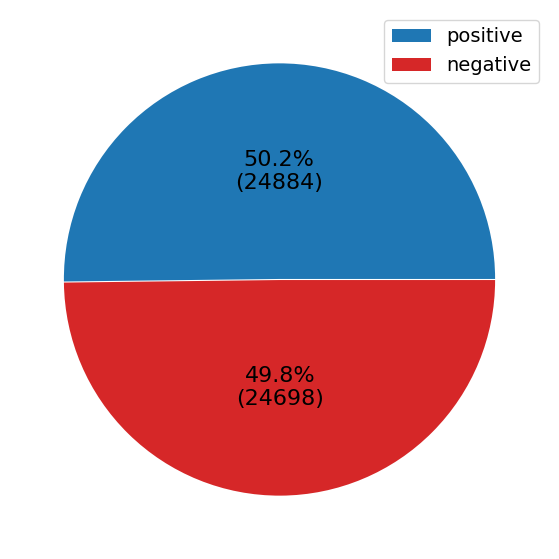

In [15]:
def func(pct, allvalues):
    absolute= int(pct/100 * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos= len(df[df['sentiment']=='positive'])
freq_neg= len(df[df['sentiment']=='negative'])
data= [freq_pos, freq_neg]
labels=['positive','negative']
pie, ax= plt.subplots(figsize= [11,7])
plt.pie(x= data, autopct= lambda pct: func(pct, data), explode=[0.0025]*2,
        pctdistance= 0.5, colors=[sns.color_palette()[0],'tab:red'], textprops= {'fontsize': 16})
plt.legend(labels, loc='best', prop={'size': 14})
plt.savefig('Piechart.png')
plt.show()

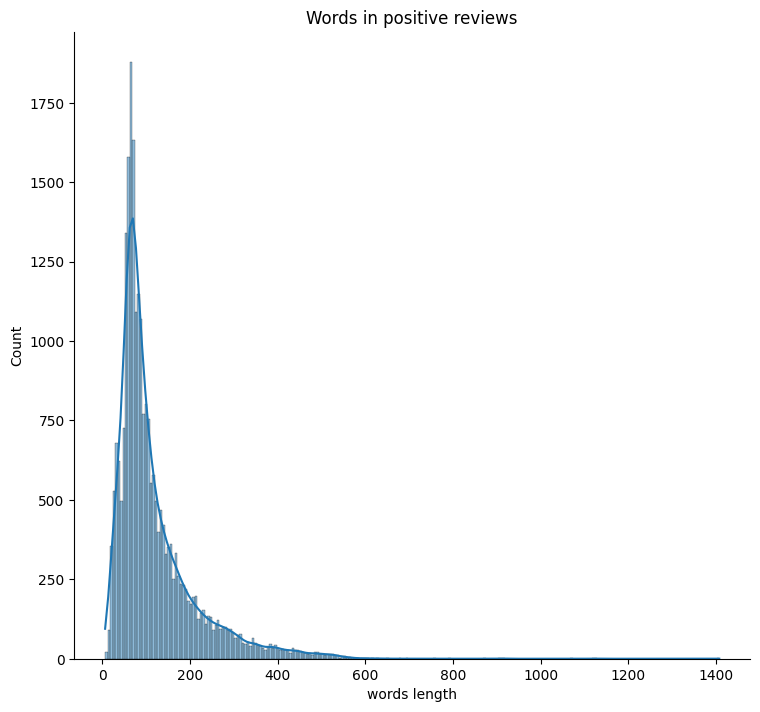

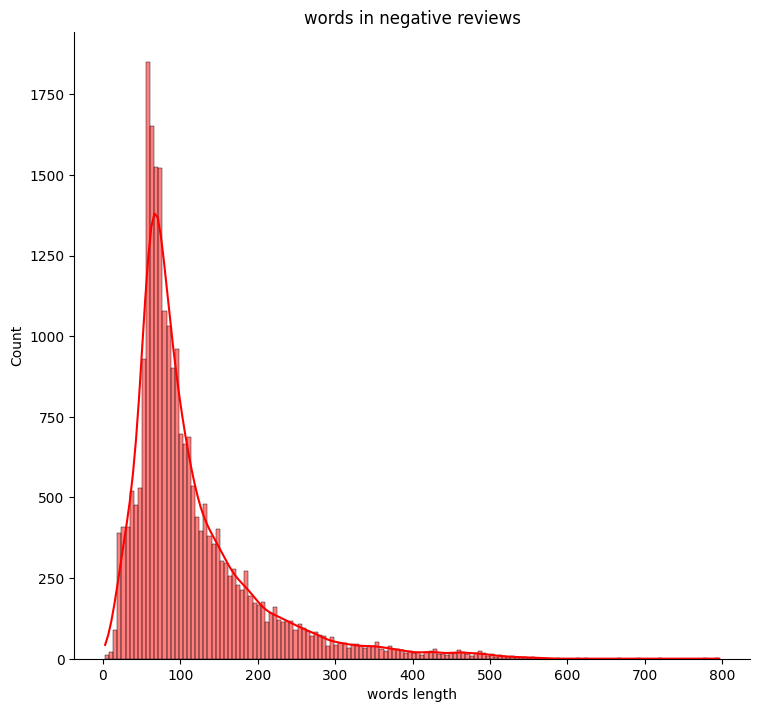

In [30]:
words_len= df['review'].str.split().map(lambda x: len(x))
df_temp= df.copy()
df_temp['words length']= words_len
hist_positive= sns.displot(
    data= df_temp[df_temp['sentiment']=='positive'],
    x='words length', hue='sentiment', kde= True,height= 7, aspect= 1.1, legend= False
).set(title= 'Words in positive reviews')
plt.show(hist_positive)

hist_negative= sns.displot(
    data= df_temp[df_temp['sentiment']=='negative'],
    x='words length', hue='sentiment', kde= True, height= 7, aspect= 1.1, legend= False, palette= ['red']
).set(title='words in negative reviews')

plt.show(hist_negative)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
label_encoder= LabelEncoder()
X= df['review']
y= df['sentiment']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
tfidf_vectorizer= TfidfVectorizer(max_features= 7000)
tfidf_vectorizer.fit(X_train, y_train)
X_train_encoded= tfidf_vectorizer.transform(X_train)
X_test_encoded= tfidf_vectorizer.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt_classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)
rf_classifier= RandomForestClassifier(random_state=42)

In [20]:
dt_classifier.fit(X_train_encoded, y_train)
y_pred_dt= dt_classifier.predict(X_test_encoded)
accuracy_score(y_test, y_pred_dt)

0.7083795502672179

In [21]:
rf_classifier.fit(X_train_encoded, y_train)
y_pred_rf= rf_classifier.predict(X_test_encoded)
accuracy_score(y_test, y_pred_dt)

0.7083795502672179

In [22]:
accuracy=[]
for max_feature in range(5000, 10000, 1000):
    tfidf_vectorizer= TfidfVectorizer(max_features=max_feature)
    tfidf_vectorizer.fit(X_train, y_train)
    X_train_encoded= tfidf_vectorizer.transform(X_train)
    X_test_encoded= tfidf_vectorizer.transform(X_test)
    dt_classifier.fit(X_train_encoded, y_train)
    y_pred_dt= dt_classifier.predict(X_test_encoded)
    accuracy.append(accuracy_score(y_test, y_pred_dt))

In [23]:
print(accuracy)

[0.7133205606534234, 0.7086820611071897, 0.7083795502672179, 0.7047494201875567, 0.708782898053847]


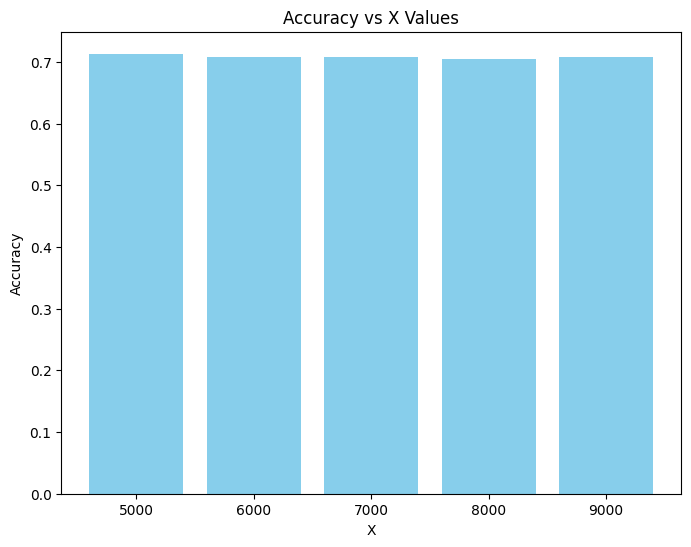

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# Data
X=['5000','6000','7000','8000','9000']
# Plotting the bar chart
plt.figure(figsize=(8,6))
plt.bar(X, accuracy,color='skyblue')

plt.title('Accuracy vs X Values')
plt.xlabel('X')
plt.ylabel('Accuracy')


plt.show()
